# Importar dados

In [1]:
import pandas as pd
train_data = pd.read_csv(r'../data/train.csv')
test_data = pd.read_csv(r'../data/test.csv')

In [2]:
train_data.shape

(112, 4)

# Analisar Dados

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         112 non-null    int64
 1   age        112 non-null    int64
 2   sex        112 non-null    int64
 3   education  112 non-null    int64
dtypes: int64(4)
memory usage: 3.6 KB


In [4]:
train_data.describe()

,id,age,sex,education
count,112.000000,112.000000,112.000000,112.000000
mean,56.500000,44.312500,0.482143,9.035714
std,32.475632,22.642156,0.501927,4.909870
min,1.000000,13.000000,0.000000,0.000000
25%,28.750000,20.000000,0.000000,4.000000
50%,56.500000,51.500000,0.000000,9.000000
75%,84.250000,65.250000,1.000000,12.000000
max,112.000000,79.000000,1.000000,20.000000


In [5]:
#fig = plt.figure(figsize = (20,5))
#ax = fig.gca()
#train_data['education'].hist(ax = ax)
train_data.head()

,id,age,sex,education
0,1,13,1,7
1,2,14,0,8
2,3,15,1,9
3,4,15,1,9
4,5,15,1,9


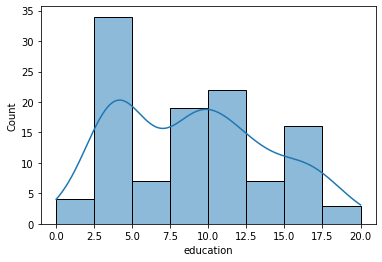

In [6]:
#train_data.isna().any()

import seaborn as sns
#sns.histplot(train_data['age'], kde='True')
#sns.histplot(train_data['sex'], kde='True')
sns.histplot(train_data['education'], kde='True')

#sns.boxplot(x=train_data['age'])
#sns.boxplot(x=train_data['sex'])
#sns.boxplot(x=train_data['education'])

import matplotlib.pyplot as plt
#corr_matrix = train_data.corr()
#f, ax = plt.subplots(figsize=(8,6))
#sns.heatmap(corr_matrix, vmin=1, vmax=1, square=True, annot=True)

# Visualisar os dados

In [7]:
import numpy as np
import scipy.io

mat = scipy.io.loadmat('../data/train_data.mat')

X = mat["train_data"]
print(X)

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.13152513 0.11770353 0.15580596 ... 0.11608478 0.15665442 0.11458643]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.02631835 0.01242944 0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.01770987 0.         0.        ]]

 [[0.13152513 0.11770353 0.15580596 ... 0.11608478 0.15665442 0.11458643]
  [0.         0.      

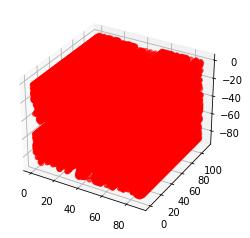

In [8]:
#todos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

z,x,y = X.nonzero()
            
ax.scatter(x, y, -z, zdir='z', c= 'red')
plt.show()

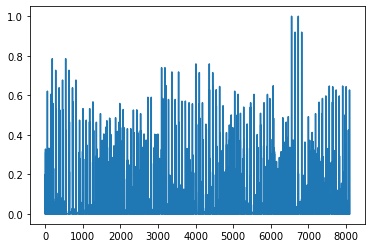

In [9]:
#Exemplo 1 pessoa
store = []
for i in range(90):
    for j in range (90):
        store.append(X[i][j][15])
        #print(X[i][j][0])
        
plt.plot(store)

# Importar matrizes de conectividade

In [10]:
def get_data_from_mat(train_file,test_file):
    train_mat = scipy.io.loadmat(train_file) 
    test_mat = scipy.io.loadmat(test_file) 
    print(train_mat.keys())
    print(test_mat.keys())
    train_np = np.array(train_mat['train_data']).transpose(2,0,1)
    test_np = np.array(test_mat['test_data']).transpose(2,0,1)
    print(train_np.shape)
    print(test_np.shape)
    return  train_np, test_np


train_mat, test_mat = get_data_from_mat('../data/train_data.mat','../data/test_data.mat')

dict_keys(['__header__', '__version__', '__globals__', 'train_data'])
dict_keys(['__header__', '__version__', '__globals__', 'test_data'])
(112, 90, 90)
(28, 90, 90)


# Treinar o modelo 1 - Utilizar os dados das matrizes e apenas as labels do csv


In [11]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 828682322050101919
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4160159744
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9668811886465257924
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [12]:
#para melhor gestão memória GPU por parte do tensorflow

def set_keras_backend(backend):
    print("A acertar o backend e libertar memória da grafica")
    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        importlib.reload(K)
        assert K.backend() == backend
    if backend == "tensorflow":
        # Allow memory growth for the GPU
        physical_devices = tf.config.experimental.list_physical_devices('GPU')
        print(physical_devices)
        tf.config.experimental.set_memory_growth(physical_devices[0], True)  
  
  
set_keras_backend("tensorflow")

A acertar o backend e libertar memória da grafica
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [13]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Flatten, Dense, Embedding, BatchNormalization,Activation,Dropout, Input, concatenate, LSTM, SimpleRNN
from livelossplot.inputs.tf_keras import PlotLossesCallback
from tensorflow.keras.initializers import RandomNormal, Constant

y_train = train_data['age']
x_train = train_mat
x_train2 = train_data.drop(['age','id'],axis=1)



inputs = Input(shape=(90,90))

conv1 = Conv1D(128, 3)(inputs)
act1 = Activation('relu') (conv1)
norm1 = BatchNormalization(momentum=0.95)(act1)
pool1 = MaxPooling1D(2) (norm1)

conv2 = Conv1D(256, 3)(pool1)
act2 = Activation('relu') (conv2)
norm2 = BatchNormalization(momentum=0.95)(act2)
pool2 = MaxPooling1D(2) (norm2)

conv3 = Conv1D(256, 3)(pool2)
act3 = Activation('relu') (conv3)
norm3 = BatchNormalization(momentum=0.95)(act3)


inputs2 = Input(shape = (2))

flat2 = Flatten()(inputs2)


flat = Flatten()(norm3)

concat = concatenate([flat, flat2])

dense1 = Dense(256, activation='relu')(concat)
dense2 = Dense(256, activation='relu') (dense1)
dense3 = Dense(100, activation='relu') (dense2)
output = Dense(1, activation='relu') (dense3)

model = Model([inputs,inputs2], output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 90, 90)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 88, 128)      34688       input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 88, 128)      0           conv1d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 88, 128)      512         activation[0][0]                 
______________________________________________________________________________________________

In [14]:
from sklearn.model_selection import train_test_split, LeaveOneOut

                    # indice do excel -1, idade
validation_indices = [0,   #13
                      4,   #15
                      23,  #18
                      21,  #21
                      19,  #24
                      24,  #26
                      34,  #31
                      29,  #33
                      20,  #37
                      44,  #41
                      30,  #46
                      80,  #51
                      109, #55
                      66,  #57
                      78,  #59
                      89,  #64
                      108, #67
                      70,  #69
                      98,  #74
                      107, #77
                      87,  #79
                      72,  #72
                     ]

def getAllIndicesNotInList(array, list):
    l = len(array)
    result= []
    for i in range(l):
        if(i not in list):
            result.append(i)
    return result

def getRowsWithIndices(dataset,indices):
    return dataset.filter(items = indices, axis=0)

def getYRowsWithIndices(dataset,indices):
    return dataset.filter(items = indices, axis=0)


usar_dados_custom = True

if usar_dados_custom:
    
    X_train = x_train[getAllIndicesNotInList(x_train, validation_indices)]
    X_test = x_train[validation_indices]

    X_train2 = getRowsWithIndices(x_train2,getAllIndicesNotInList(x_train2, validation_indices))
    X_test2 = getRowsWithIndices(x_train2,validation_indices)

    Y_train = getYRowsWithIndices(y_train,getAllIndicesNotInList(y_train, validation_indices))
    Y_test = getYRowsWithIndices(y_train,validation_indices)
            
else:
    X_train, X_test, X_train2, X_test2, Y_train, Y_test  = train_test_split(x_train,x_train2,y_train, test_size=0.2, random_state=25)


model.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_absolute_error')

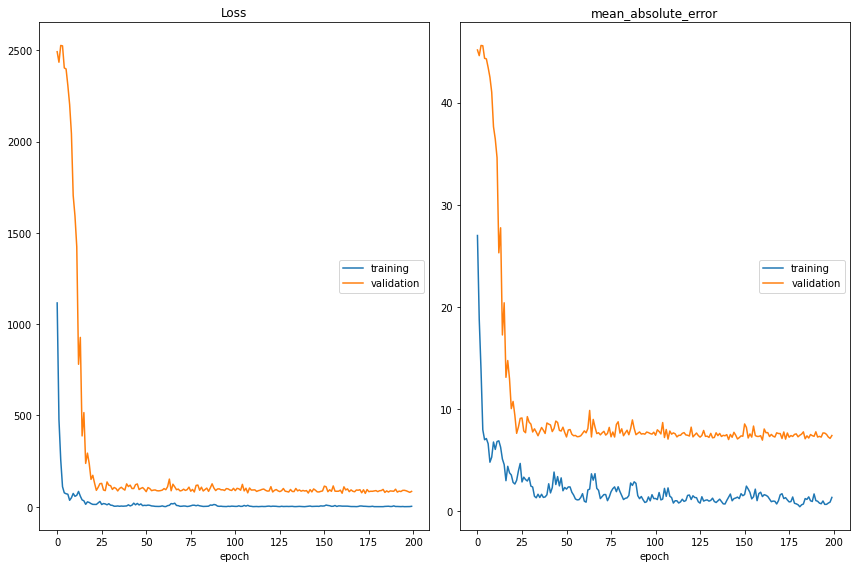

Loss
	training         	 (min:    0.294, max: 1116.195, cur:    2.627)
	validation       	 (min:   73.563, max: 2525.957, cur:   84.240)
mean_absolute_error
	training         	 (min:    0.426, max:   26.988, cur:    1.340)
	validation       	 (min:    6.949, max:   45.599, cur:    7.400)


In [15]:


history = model.fit([X_train,X_train2], Y_train, epochs=200, batch_size=16, validation_data=([X_test,X_test2],Y_test), callbacks=[PlotLossesCallback()])

# Usar o modelo

In [16]:
resultados_finais = model.predict([test_mat,test_data.drop(['id'],axis=1)])
print(resultados_finais)

[[19.967432]
 [21.935053]
 [19.741232]
 [19.918736]
 [19.666225]
 [24.411272]
 [55.355473]
 [49.717834]
 [58.2623  ]
 [61.398174]
 [61.928013]
 [69.21527 ]
 [64.849945]
 [69.07212 ]
 [17.128334]
 [18.145542]
 [21.45079 ]
 [37.48193 ]
 [19.651148]
 [21.044947]
 [53.134796]
 [69.47237 ]
 [53.39677 ]
 [68.96501 ]
 [57.05783 ]
 [62.034725]
 [61.04312 ]
 [62.849045]]


# Prepare submission

In [17]:
with open("submissao.csv", "w") as sub:
    # Writing data to a file
    sub.write('id,age\n')
    for i in test_data['id']:
        sub.write(str(i)+','+str(float(resultados_finais[i-1]))+'\n')
    